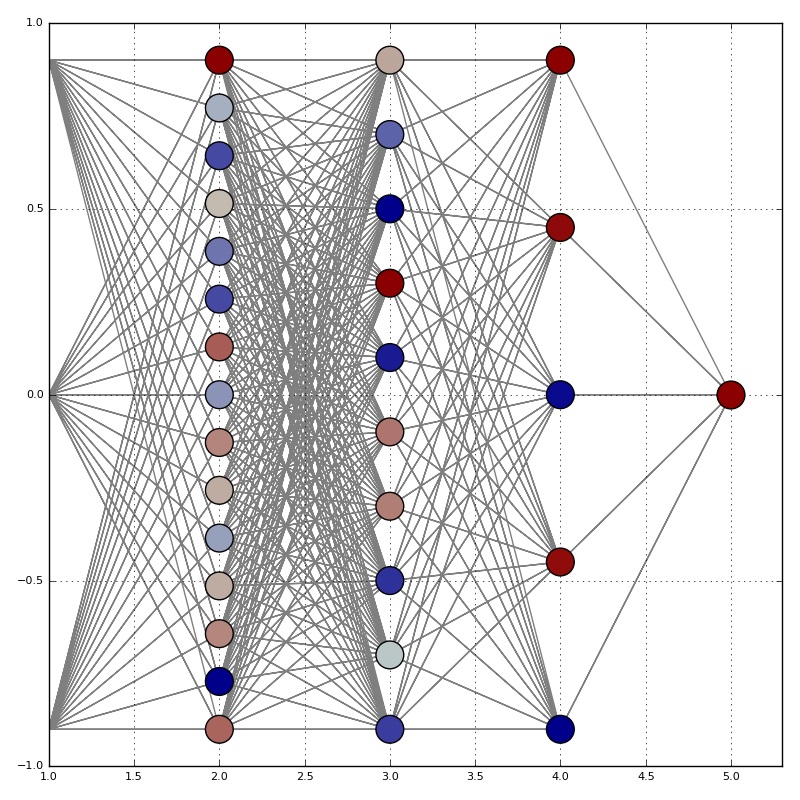

In [23]:
using Plots, OnlineAI

net = buildClassificationNet(3,1,[15,10,5])
for i in 1:1000
    x = rand(3)
    update!(net, x, Float64[sum(x)])
end

plot(leg=false, xlim=(1,length(net.layers)+1.3), ylim=(-1,1), size=(800,800))

ns = vcat(net.layers[1].nin, [l.nout for l in net.layers])
ys = map(n->n>1 ? linspace(0.9,-0.9,n) : zeros(1), ns)
xs = [i*ones(n) for (i,n) in enumerate(ns)]

for i in 2:length(ns)
    x1, x2 = xs[i-1:i]
    y1, y2 = ys[i-1:i]
    pts = Tuple{Float64,Float64}[]
    for i1 in 1:length(x1)
        for i2 in 1:length(x2)
            push!(pts, (x1[i1], y1[i1]))
            push!(pts, (x2[i2], y2[i2]))
        end
    end
    plot!(Plots.unzip(pts)..., line=(0.5,:black))
end
    
for i in 2:length(ns)
    scatter!(xs[i], ys[i], m=20, c=:redsblues, zcolor=net.layers[i-1].a)
end
current()

In [21]:
net.layers[1].a

5-element Array{Float64,1}:
 0.5
 0.5
 0.5
 0.5
 0.5